using this clahe-histogram-eqalization-opencv
https://www.geeksforgeeks.org/clahe-histogram-eqalization-opencv/




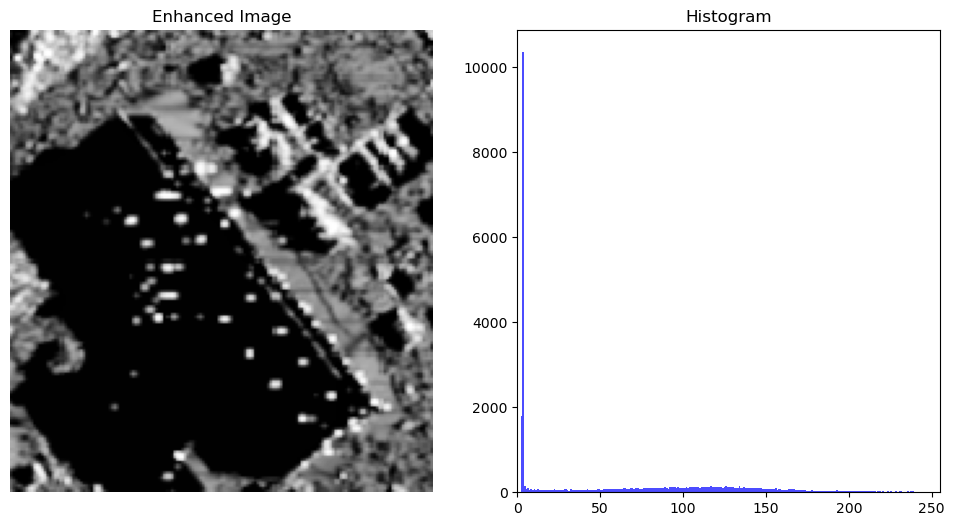

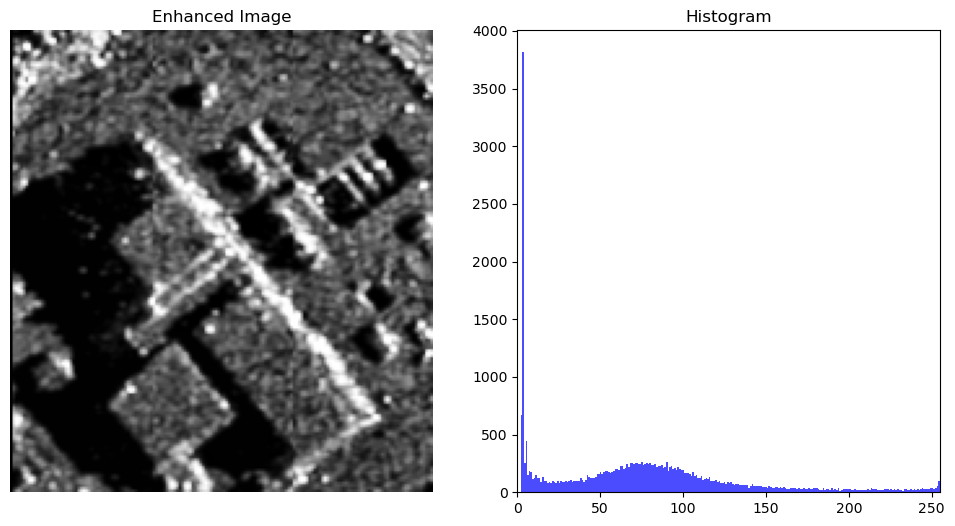

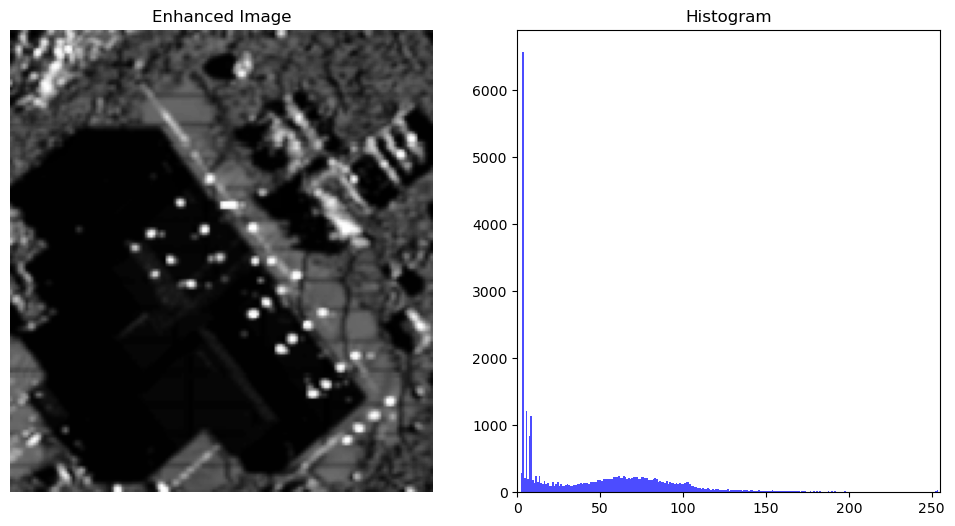

Enhanced images saved to: /Users/chiayeeho/Documents/21_IMAGES/clahe_enhanced/


In [13]:
import cv2
import os
import matplotlib.pyplot as plt

input_image_paths = [
    '/Users/chiayeeho/Documents/21_IMAGES/high_detailed4.tif',
    '/Users/chiayeeho/Documents/21_IMAGES/dsm_onagawa.tif',
    '/Users/chiayeeho/Documents/21_IMAGES/low_polygon.tif',
]

output_directory = '/Users/chiayeeho/Documents/21_IMAGES/clahe_enhanced/'

os.makedirs(output_directory, exist_ok=True)

# Loop through each input image
for image_path in input_image_paths:
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create an instance of the CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))

    # Apply CLAHE to the image
    enhanced_image = clahe.apply(image)

    # Get the filename from the input image path
    filename = os.path.basename(image_path)

    # Save the enhanced image to the output directory
    output_path = os.path.join(output_directory, f'clahe_{filename}')
    cv2.imwrite(output_path, enhanced_image)

    # Optionally, display the enhanced image and its histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')

    plt.subplot(122)
    plt.hist(enhanced_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
    plt.title('Histogram')
    plt.xlim(0, 255)

    plt.show()

print('Enhanced images saved to:', output_directory)


In [ ]:
import cv2
import numpy as np

# Load the images using OpenCV and convert to grayscale

img1 = cv2.imread('/Users/chiayeeho/Documents/21_IMAGES/authentic_small.tif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/Users/chiayeeho/Documents/21_IMAGES/clahe_dsm.tif', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('/Users/chiayeeho/Documents/21_IMAGES/clahe_low_poygon.tif', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('/Users/chiayeeho/Documents/21_IMAGES/clahe_high_detailed4.tif', cv2.IMREAD_GRAYSCALE)


# Ensure both images have the same dimensions (resize if needed)
# You can resize img2, img3, and img4 to match img1 if necessary.

# Calculate the Mean Squared Error (MSE) between the images
mse1 = np.mean((img1 - img2) ** 2)
mse2 = np.mean((img1 - img3) ** 2)
mse3 = np.mean((img1 - img4) ** 2)

# Calculate the PSNR using the MSE
max_pixel_value = 255  # Assuming 8-bit images
psnr1 = 10 * np.log10((max_pixel_value ** 2) / mse1)
psnr2 = 10 * np.log10((max_pixel_value ** 2) / mse2)
psnr3 = 10 * np.log10((max_pixel_value ** 2) / mse3)

print('PSNR and dsm:', psnr1)
print('PSNR real and lod2:', psnr2)
print('PSNR real and lod3:', psnr3)

In [ ]:
from skimage.metrics import structural_similarity as ssim
import cv2

# Load the original and adjusted images using OpenCV and convert to grayscale
img1 = cv2.imread('/Users/chiayeeho/Documents/21_IMAGES/authentic_small.tif', cv2.IMREAD_GRAYSCALE)
adjusted_image2 = cv2.imread('/Users/chiayeeho/Documents/21_IMAGES/clahe_dsm.tif', cv2.IMREAD_GRAYSCALE)
adjusted_image3 = cv2.imread('/Users/chiayeeho/Documents/21_IMAGES/clahe_low_poygon.tif', cv2.IMREAD_GRAYSCALE)
adjusted_image4 = cv2.imread('/Users/chiayeeho/Documents/21_IMAGES/clahe_high_detailed4.tif', cv2.IMREAD_GRAYSCALE)


# Calculate SSIM using scikit-image
ssim_value1 = ssim(img1, adjusted_image2)
ssim_value2 = ssim(img1, adjusted_image3)
ssim_value3 = ssim(img1, adjusted_image4)


print('SSIM between real and dsm:', ssim_value1)
print('SSIM between real and lod2:', ssim_value2)
print('SSIM between real and lod3:', ssim_value3)
 

In [ ]:
plt.hist(img1.ravel(), bins=256, range=(0, 255))
plt.hist(adjusted_image2.ravel(), bins=256, range=(0, 255))
plt.hist(adjusted_image3.ravel(), bins=256, range=(0, 255))
plt.hist(adjusted_image4.ravel(), bins=256, range=(0, 255)) 